In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



In [2]:
# Load the dataset
data = pd.read_csv("PCA.csv")


In [3]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])


In [4]:
# Fill missing values with the column mean
numeric_data = numeric_data.fillna(numeric_data.mean())


In [5]:
# Standardize the numeric data
data_standardized = StandardScaler().fit_transform(numeric_data)


In [6]:
# Convert standardized data back to a DataFrame
standardized_df = pd.DataFrame(data_standardized, columns=numeric_data.columns)

# Display the first few rows of the standardized data
print(standardized_df.head())


   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.222105       0.922368          -0.763821     0.293785
1        0.188962      -0.611501          -1.197561    -0.766966
2       -0.497357      -0.429058          -0.560793    -0.214794
3        0.127392      -0.199316          -2.046585    -0.403695
4       -0.497357      -0.577715          -0.394680    -0.100624


In [7]:
# Initialize PCA and fit the standardized data
pca = PCA(n_components=len(numeric_data.columns))
pca.fit(data_standardized)

# Transform the data using PCA
data_pca = pca.transform(data_standardized)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data_pca, columns=[f"PC{i+1}" for i in range(len(numeric_data.columns))])

# Display the transformed data (principal components)
print(pca_df.head())


        PC1       PC2       PC3       PC4
0  0.605936 -0.775762 -0.121257  0.765609
1 -1.220888 -0.631781 -0.657922  0.330838
2 -0.284485 -0.423896 -0.697972 -0.210470
3 -1.014883 -1.527239 -0.687324  0.756687
4 -0.272799 -0.349173 -0.604630 -0.430231


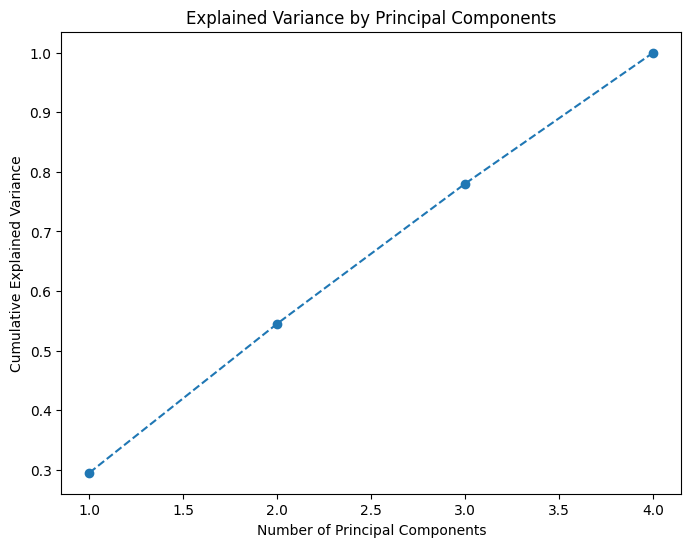

In [8]:
# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(numeric_data.columns) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.show()
